In [43]:
from decimal import Decimal
import random
import matplotlib.pyplot as plt
from math import (
    cos,
    exp,
    factorial,
    pi,
    sin,
)
import numpy

## Problem 1
### (a)

In [44]:
def get_next_pos(x, N):
    '''
    Given x_n returns x_{n+1}
    '''
    return (x + random.choice([-1, 0, 1])) % N

def random_walk(N, start_pos, t):
    '''
    Starts the system at start_pos (X_0) and performs a random walk of length t
    Returns a list of positions of X
    '''
    pos_list = []
    pos_list.append(start_pos)
    x = start_pos
    for i in range(t):
        x = get_next_pos(x, N)
        pos_list.append(x)
    return pos_list

### (b)

Text(0, 0.5, '$X_n$')

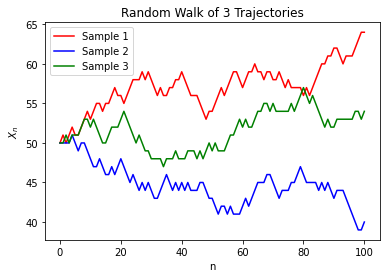

In [45]:

N = 100
start_pos = 50
t = 100

sample1 = random_walk(N, start_pos, t)
sample2 = random_walk(N, start_pos, t)
sample3 = random_walk(N, start_pos, t)

plt.plot(range(t + 1), sample1, color = "red", label = "Sample 1")
plt.plot(range(t + 1), sample2, color = "blue", label = "Sample 2")
plt.plot(range(t + 1), sample3, color = "green", label = "Sample 3")
plt.legend()
plt.title("Random Walk of 3 Trajectories")
plt.xlabel("n")
plt.ylabel(r"$X_n$")

### (c)
We can compute $\langle dX_n \rangle = \frac{1}{3} \times -1 + \frac{1}{3} \times 0 + \frac{1}{3} \times 1 = 0$.
We can compute $\langle {dX_n}^2 \rangle = \frac{1}{3} \times (-1)^2 + \frac{1}{3} \times 0 + \frac{1}{3} \times 1^2 = \frac{2}{3}$

### (d)
Using the recursive definition of $X_n$, we can say that $X_T = X_0 + \sum_{i = 0}^{T-1} dX_{i}$. Thus $D = X_T - X_0 = \sum_{i = 0}^{T-1} dX_{i}$. We start with $\langle D \rangle = \langle \sum_{i = 0}^{T-1} dX_{i} \rangle$ and use linearity of mean to obtain $\sum_{i=0}^{T-1} \langle dX_{i} \rangle$ and since each $dX_{i}$ is independent we obtain $T \langle dX_{i} \rangle = 0$.

For $\langle D^2 \rangle$, we have $\langle (\sum_{i = 0}^{t-1} dX_{i})^2 \rangle = \langle \sum_{i} {dX_i}^2 + \sum_{i \neq  j} dX_i dX_j \rangle$. Using linearity of expectation and the fact that when $i \neq j$ that $dX_i, dX_j$ are independent we obtain $\sum_{i=0}^{T-1} \langle {dX_i}^2 \rangle + \sum_{i \neq j}\langle dX_i \rangle \langle dX_j \rangle$ which we can evalate to $\frac{2}{3}T$

### (e)

Sample estimate of mean of D: 0.19
Sample estimate of variance of D: 64.234682


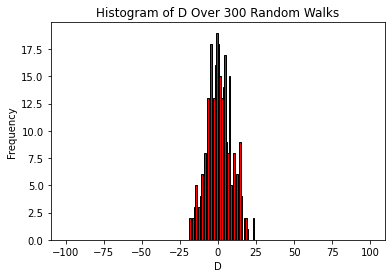

In [46]:
d_samples = []
for i in range(300):
    last_pos = random_walk(N, start_pos, t)[-1]
    d_samples.append(last_pos - start_pos)

plt.hist(d_samples, bins = range(-t, t + 1), color = "red", edgecolor = "black")
plt.title("Histogram of D Over 300 Random Walks")
plt.xlabel("D")
plt.ylabel("Frequency")

d_bar = sum(d_samples) / len(d_samples)
print(f"Sample estimate of mean of D: {round(d_bar, 6)}")
var_bar = 0
for sample in d_samples:
    var_bar += ((sample - d_bar) ** 2)
var_bar /= (len(d_samples) - 1)
print(f"Sample estimate of variance of D: {round(var_bar, 6)}")

### (f)

Text(0, 0.5, 'Probability')

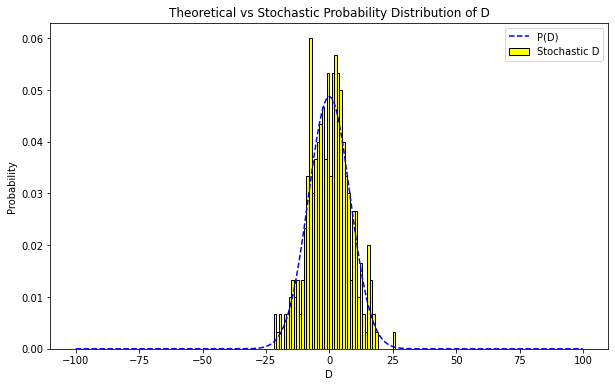

In [38]:
def generate_pd(t):
    '''
    Generate the probability of values of D
    '''
    p_d = []
    d_vals = range(-t, t + 1)
    numerator = Decimal(factorial(t)) / Decimal(3 ** t)
    factorial_memo = {}
    for d in d_vals:
        prob = 0
        # k0 represents when dX = 1
        for k0 in range(max(0, d), t + 1):
            # We want k0 + (-1)k1 = d
            # Rearranging this gives us
            k1 = k0 - d
            # Need to make sure we have enough k1
            if t - k0 < k1:
                break
            k2 = t - k0 - k1
            # Calculate trinomial probability without overflow
            if factorial_memo.get(k0) is not None:
                k0_factorial = factorial_memo.get(k0)
            else:
                k0_factorial = Decimal(factorial(k0))
                factorial_memo[k0] = k0_factorial

            if factorial_memo.get(k1) is not None:
                k1_factorial = factorial_memo.get(k1)
            else:
                k1_factorial = Decimal(factorial(k1))
                factorial_memo[k1] = k1_factorial

            if factorial_memo.get(k2) is not None:
                k2_factorial = factorial_memo.get(k2)
            else:
                k2_factorial = Decimal(factorial(k2))
                factorial_memo[k2] = k2_factorial

            curr_prob = numerator / (k0_factorial * k1_factorial * k2_factorial)
            prob += curr_prob
        p_d.append(prob)
    return p_d

p_d = generate_pd(t)
plt.figure(figsize=(10, 6))
plt.plot(range(-t, t+1), p_d, color = "blue", ls = "--", label = "P(D)")
weights = numpy.divide(numpy.ones_like(d_samples), 300)
plt.hist(d_samples, weights = weights, bins = range(-t, t+1), edgecolor = "black", color = "yellow", label = "Stochastic D")
plt.legend()
plt.title("Theoretical vs Stochastic Probability Distribution of D")
plt.xlabel("D")
plt.ylabel("Probability")

###  (g)

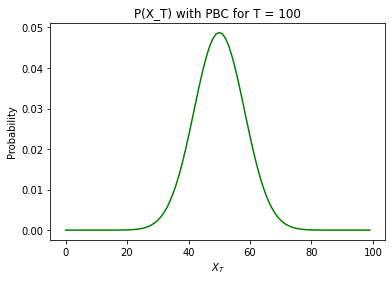

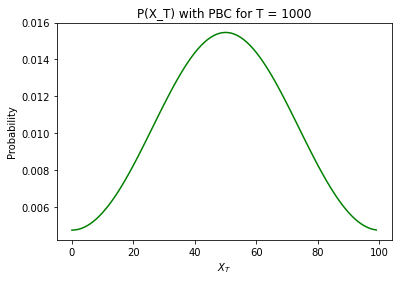

In [39]:
for t in [100, 1000]:
    p_delta = generate_pd(t)
    p_d_pbc = [0 for _ in range(N)]
    for j in range(len(p_delta)):
        delta = j - t
        p_d_pbc[(50 + delta) % N] += p_delta[j]
    plt.plot(range(N), p_d_pbc, color = "green")
    plt.title(r"P(X_T) with PBC for T = " + f"{t}")
    plt.ylabel("Probability")
    plt.xlabel(r"$X_T$")
    plt.show()


For this problem, we have to now consider PBC. In the above code I calculate $\delta = \sum_{i=0}^{t-1} dX_{i}$ and then find $X_T  = (50 + \delta) \% n$ for $T = 100, 1000$. I don't do higher values because then the run time is too high. \newline

We can realize that the width of the curve is roughly the same as the width of the curve of D because when as $\delta$ increases or decreases away from 0 enough that it starts to wrap around, the effect is marginal. I choose to define the width as such as $2\sigma_D$. Thus if we want our width to span the entire system we want $2\sigma_D = N$. Knowing from (d) that $\langle D^2 \rangle = \frac{2T}{3}$ and that $\langle D \rangle = 0$ we have that $\sigma_D = \sqrt{\frac{2T}{3}}$, we can evaluate our equation to obtain $T \approx \frac{3N^2}{8}$. For $N = 100$, this results in $T \approx 3750$

## Problem 3
### (a)

In [40]:
N = 5
mat = [[0] * N for _ in range(N)]

for j in range(N):
    possible_i = [(j-1)%N, j, (j+1)%N]
    for i in possible_i:
        mat[i][j] += (1 / 3)

M = numpy.matrix(mat)
print(M)


[[0.33333333 0.33333333 0.         0.         0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333]
 [0.33333333 0.         0.         0.33333333 0.33333333]]


### (b)

In [41]:
eigenvals, eigenvecs = numpy.linalg.eig(M)
#print(eigenvals)
#print(eigenvecs)

sorted_eigenvals = sorted(eigenvals, key = lambda x: abs(x), reverse = True)

print("Sorted eigenvalues by dereasing magnitude:")
for x in sorted_eigenvals:
    print(x)

v1 = numpy.squeeze(numpy.asarray(eigenvecs[:,2]))
print(f"Eigenvector for eigenvalue = 1: {v1}")

p = v1
p = list(map(lambda x: x / sum(p), p))
print(f"p (normalized eigenvector): {p}")

Sorted eigenvalues by dereasing magnitude:
0.9999999999999999
0.5393446629166316
0.5393446629166314
-0.20601132958329832
-0.20601132958329815
Eigenvector for eigenvalue = 1: [-0.4472136 -0.4472136 -0.4472136 -0.4472136 -0.4472136]
p (normalized eigenvector): [0.2, 0.2000000000000001, 0.2, 0.19999999999999996, 0.2]


My p is so simple because p represents the long term stable distribution and since there is a uniform chance of moving to the left and right and our world wraps around, the probability of reaching a certain position after n steps as $n \to \infty$ should be uniformly distributed which it is as desired.

### (f)

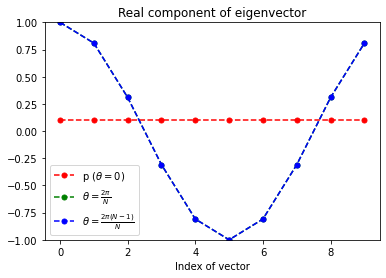

Text(0.5, 0, 'Index of vector')

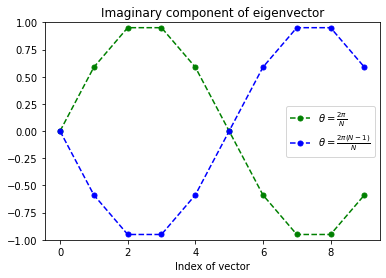

In [55]:
N = 10

p = [1/N] * 10

eigenvec1 = []
eigenvec2 = []

for j in range(N):
    theta = 2 * pi * j / N
    eigenvec1.append([cos(theta), sin(theta)])

    theta = 2 * pi * (N-1) * j / N
    eigenvec2.append([cos(theta), sin(theta)])

plt.plot(range(N), p, color = "red", label = r"p ($\theta = 0$)", ls = "--", ms = 10, marker = ".")
plt.plot(range(N), list(map(lambda x: x[0], eigenvec1)), color = "green", label = r"$\theta = \frac{2\pi}{N}$", ls = "--", ms = 10, marker = ".")
plt.plot(range(N), list(map(lambda x: x[0], eigenvec2)), color = "blue", label = r"$\theta = \frac{2\pi(N-1)}{N}$", ls = "--", ms = 10, marker = ".")
plt.ylim(-1, 1)
plt.legend()
plt.title("Real component of eigenvector")
plt.xlabel("Index of vector")
plt.show()

plt.plot(range(N), list(map(lambda x: x[1], eigenvec1)), color = "green", label = r"$\theta = \frac{2\pi}{N}$", ls = "--", ms = 10, marker = ".")
plt.plot(range(N), list(map(lambda x: x[1], eigenvec2)), color = "blue", label = r"$\theta = \frac{2\pi(N-1)}{N}$", ls = "--", ms = 10, marker = ".")
plt.ylim(-1, 1)
plt.legend()
plt.title("Imaginary component of eigenvector")
plt.xlabel("Index of vector")